### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


In [16]:
tf.__version__

'2.8.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   brightness_range=None,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   dtype=None
                                   )
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (64, 64),
                                                 color_mode="rgb",
                                                 batch_size = 32,
                                                 interpolation="nearest",
                                                 class_mode = 'binary')

Found 90 images belonging to 2 classes.


### Preprocessing the Test set

In [18]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            shuffle=True,
                                            class_mode = 'binary')
                                            

Found 24 images belonging to 2 classes.


In [ ]:
# Display 12 images of moles, and how they are classified

from keras.preprocessing import image

# x=np.concatenate([training_set.next()[0] for i in range(training_set.__len__())])
# y=np.concatenate([training_set.next()[1] for i in range(training_set.__len__())])

x, y = training_set.next()

fig=plt.figure(figsize=(10, 9)) 
columns = 4
rows = 3
for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(x[i], interpolation='nearest')

## Part 2 - Building the CNN

### Initialising the CNN

### Step 1 - Convolution

### Step 2 - Pooling

### Adding a second convolutional layer

### Step 3 - Flattening

### Step 4 - Full Connection

### Step 5 - Output Layer

In [20]:

def build():
    cnn = Sequential()
    cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
    cnn.add(MaxPool2D(pool_size=2, strides=2))
    cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
    cnn.add(MaxPool2D(pool_size=2, strides=2))
    cnn.add(Flatten())
    cnn.add(Dense(units=50, activation='relu'))
    cnn.add(Dense(units=1, activation='sigmoid'))
    cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return cnn

## Part 3 - Training the CNN

### Compiling the CNN

### Training the CNN on the Training set and evaluating it on the Test set

In [21]:
cnn = build()

history = cnn.fit(x = training_set, validation_data = test_set, epochs =10)

Epoch 1/10
3/3 [==============================] - 1s 275ms/step - loss: 0.7126 - accuracy: 0.4778 - val_loss: 0.7143 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 1s 216ms/step - loss: 0.6851 - accuracy: 0.5444 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 1s 190ms/step - loss: 0.6836 - accuracy: 0.6333 - val_loss: 0.6888 - val_accuracy: 0.4583
Epoch 4/10
3/3 [==============================] - 1s 197ms/step - loss: 0.6897 - accuracy: 0.5000 - val_loss: 0.6903 - val_accuracy: 0.5417
Epoch 5/10
3/3 [==============================] - 1s 191ms/step - loss: 0.6799 - accuracy: 0.6111 - val_loss: 0.6900 - val_accuracy: 0.6667
Epoch 6/10
3/3 [==============================] - 1s 191ms/step - loss: 0.6709 - accuracy: 0.6556 - val_loss: 0.7058 - val_accuracy: 0.4583
Epoch 7/10
3/3 [==============================] - 1s 193ms/step - loss: 0.6591 - accuracy: 0.5667 - val_loss: 0.7286 - val_accuracy: 0.5000
Epoch 8/10
3/3 [====

In [22]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


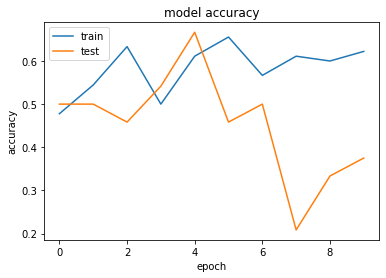

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

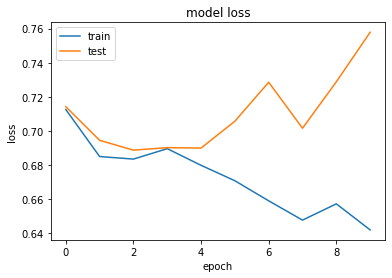

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Part 4 - Making a single prediction

In [32]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/predict/46.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if int(result[0][0]) == 1:
  prediction = 'benign'
else:
  prediction = 'malignant'

In [33]:
print(int(result))
print(prediction)

1
benign


In [13]:
from keras import backend as K 

K.clear_session()
del cnn
del history

In [14]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV


kfold = KFold(n_splits=10, 
              shuffle=True, 
              random_state=11)
cvscores = []

for train, test in kfold.split(x, y):
    
    cnn = build()
    cnn.fit(x[train], y[train], epochs = 10, batch_size=64, verbose=0)
    
    
    scores = cnn.evaluate(x[test], y[test], verbose=0)
    
    print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    K.clear_session()
    del cnn
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


accuracy: 75.00%
accuracy: 50.00%
accuracy: 66.67%
accuracy: 100.00%
accuracy: 66.67%
accuracy: 100.00%
accuracy: 66.67%
accuracy: 66.67%
accuracy: 33.33%
accuracy: 0.00%
62.50% (+/- 28.20%)
